# Clustering 

## 1. DBSCAN
Using DBSCAN iterate (for-loop) through different values of `min_samples` (1 to 10) and `epsilon` (.05 to .5, in steps of .01)  to find clusters in the road-data used in the Lesson and calculate the Silohouette Coeff for `min_samples` and `epsilon`. Plot **_one_** line plot with the multiple lines generated from the min_samples and epsilon values. Use a 2D array to store the SilCoeff values, one dimension represents `min_samples`, the other represents epsilon.

Expecting a plot of `epsilon` vs `sil_score`.

In [8]:
import pandas as pd
# allow plots to appear in the notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['font.size'] = 14
# plt.rcParams['figure.figsize'] = (20.0, 10.0)
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler # used Z-score normalization in place of this

In [33]:
# IMPORT DATA
X = pd.read_csv('/Users/alexyerg/Desktop/Johns Hopkins/MLNN/mlnn-main/data/3D_spatial_network.txt.gz', header=None, names=['osm', 'lat','lon','alt'])
X = X.drop(['osm'], axis=1).sample(5000)
X.head()

,lat,lon,alt
33976,9.007034,56.805141,5.431232
321447,9.881098,57.054303,1.852562
418887,9.183549,57.056423,2.842023
65951,9.917318,57.539047,26.327162
319484,9.431463,56.843625,29.880334


In [34]:
# Standardize/Scale: Z-score normalization
XX = X.copy()
XX['alt'] = (X.alt - X.alt.mean())/X.alt.std()
XX['lat'] = (X.lat - X.lat.mean())/X.lat.std()
XX['lon'] = (X.lon - X.lon.mean())/X.lon.std()
XX.head()

,lat,lon,alt
33976,-1.153252,-0.966327,-0.885270
321447,0.229865,-0.111745,-1.076911
418887,-0.873936,-0.104476,-1.023924
65951,0.287179,1.550839,0.233728
319484,-0.481636,-0.834333,0.424003


In [16]:
from sklearn.cluster import DBSCAN
import pandas as pd  # Make sure pandas is imported

dbscan = DBSCAN(eps=0.12)
# Assuming XX is a DataFrame, assign the cluster labels to a new column
XX['cluster'] = dbscan.fit_predict(XX[['lat', 'lon', 'alt']])

# Now, you can use value_counts() on the 'cluster' column because it's part of a DataFrame
print(XX['cluster'].value_counts())

-1     824
 2      31
 3      19
 1      16
 8      15
 5      12
 0      10
 6       8
 10      7
 4       7
 9       7
 14      6
 11      6
 17      6
 7       6
 13      5
 12      5
 15      5
 16      5
Name: cluster, dtype: int64


### Clustering evaluation

The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

<IPython.core.display.Javascript object>


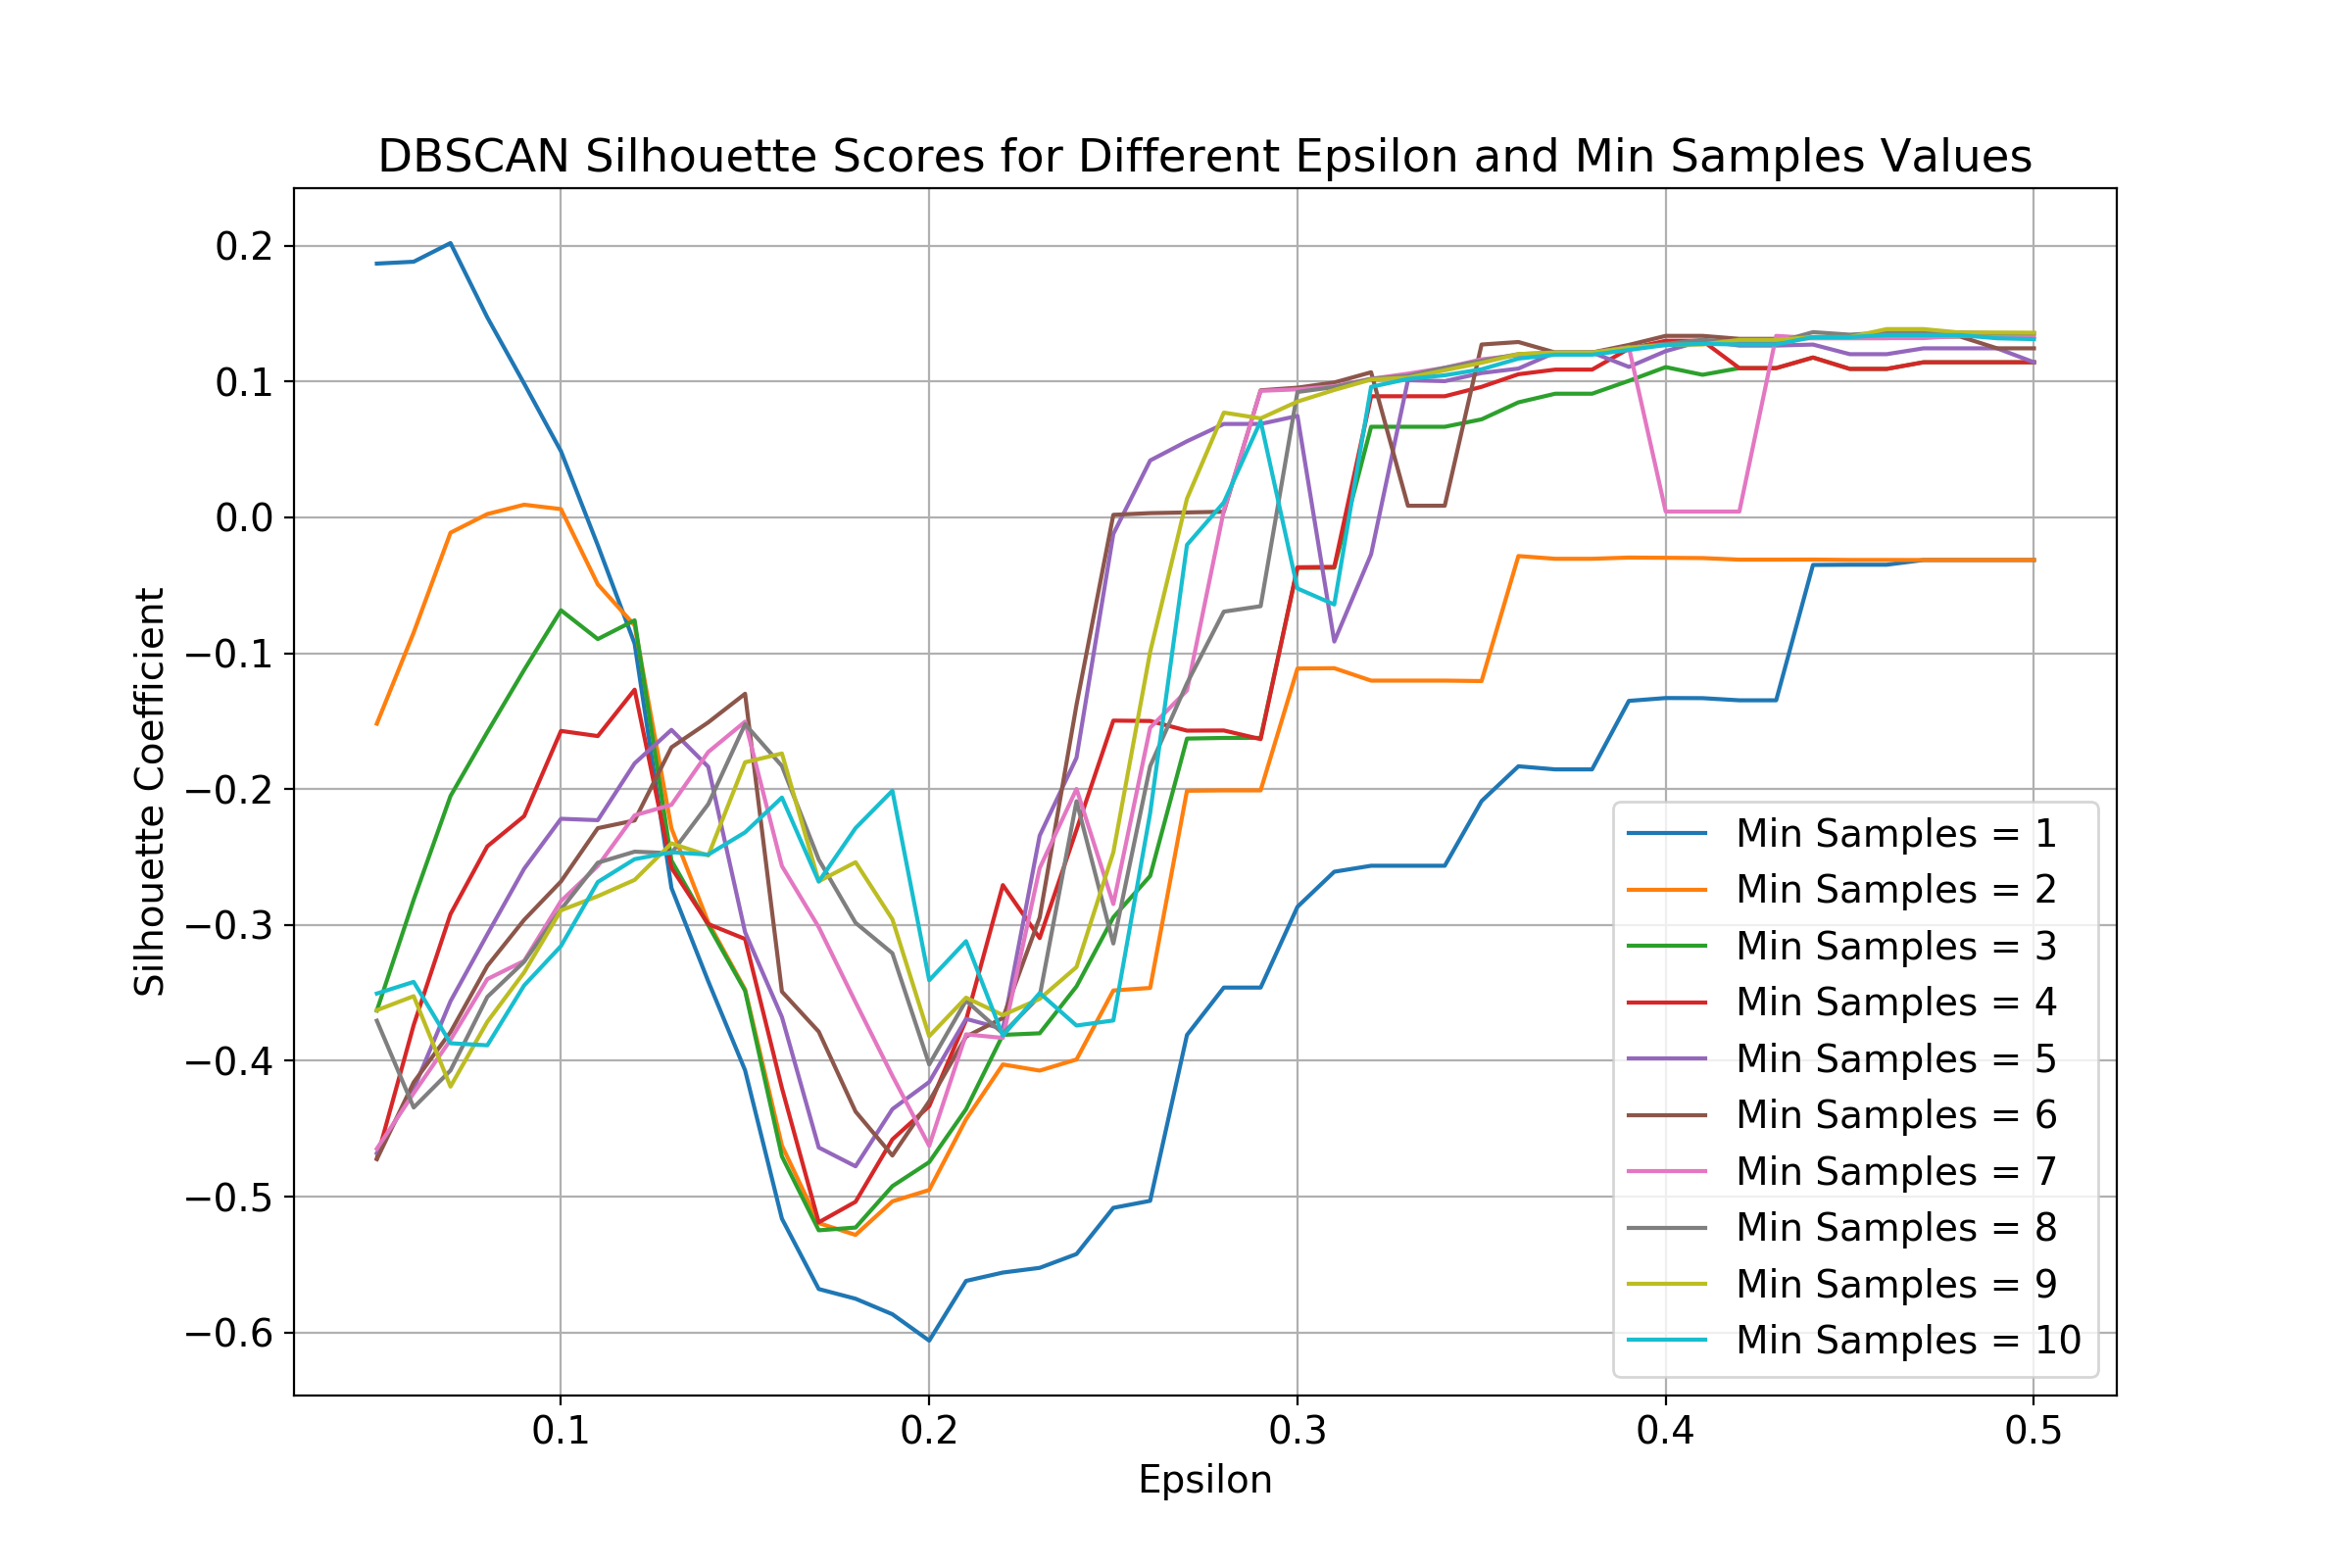

In [35]:
epsilons = np.arange(0.05, 0.51, 0.01)
min_samples_range = range(1, 11)

# Initialize an empty list to store lists of silhouette scores for each min_samples setting
all_scores = []

# Loop over the range of min_samples values
for min_samples in min_samples_range:
    scores = []
    for eps in epsilons:
        
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        XX['cluster'] = dbscan.fit_predict(XX[['lat', 'lon', 'alt']])
        
        # calculate the silhouette score 
        try:
            score = silhouette_score(XX[['lon', 'lat', 'alt']], XX['cluster'])
        except ValueError:  # catch errors from improper clustering 
            score = -1  # default value in case of an error
        
        scores.append(score)
    all_scores.append(scores)

# Convert all_scores to numpy array for plotting
all_scores = np.array(all_scores)

# Plot
plt.figure(figsize=[12, 8])
for i, min_samples in enumerate(min_samples_range):
    plt.plot(epsilons, all_scores[i], label=f'Min Samples = {min_samples}')
plt.title('DBSCAN Silhouette Scores for Different Epsilon and Min Samples Values')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Coefficient')
plt.legend()
plt.grid(True)
plt.show()


## 2. Clustering your own data
Using your own data, find relevant clusters/groups within your data (repeat the above). If your data is labeled with a class that you are attempting to predict, be sure to not use it in training and clustering. 

You may use the labels to compare with predictions to show how well the clustering performed using one of the clustering metrics (http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation). 

If you don't have labels, use the silhouette coefficient to show performance. Find the optimal fit for your data but you don't need to be as exhaustive as above.

Additionally, show the clusters in 2D or 3D plots. 

As a bonus, try using PCA first to condense your data from N columns to less than N.

Two items are expected: 
- Metric Evaluation Plot (like in 1.)
- Plots of the clustered data

# K-means w/PCA on Wine data 

In [36]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [46]:
# import iris
wine = datasets.load_wine()
X = wine.data
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

## Determine if scaling is needed: YES, need to scale

<IPython.core.display.Javascript object>


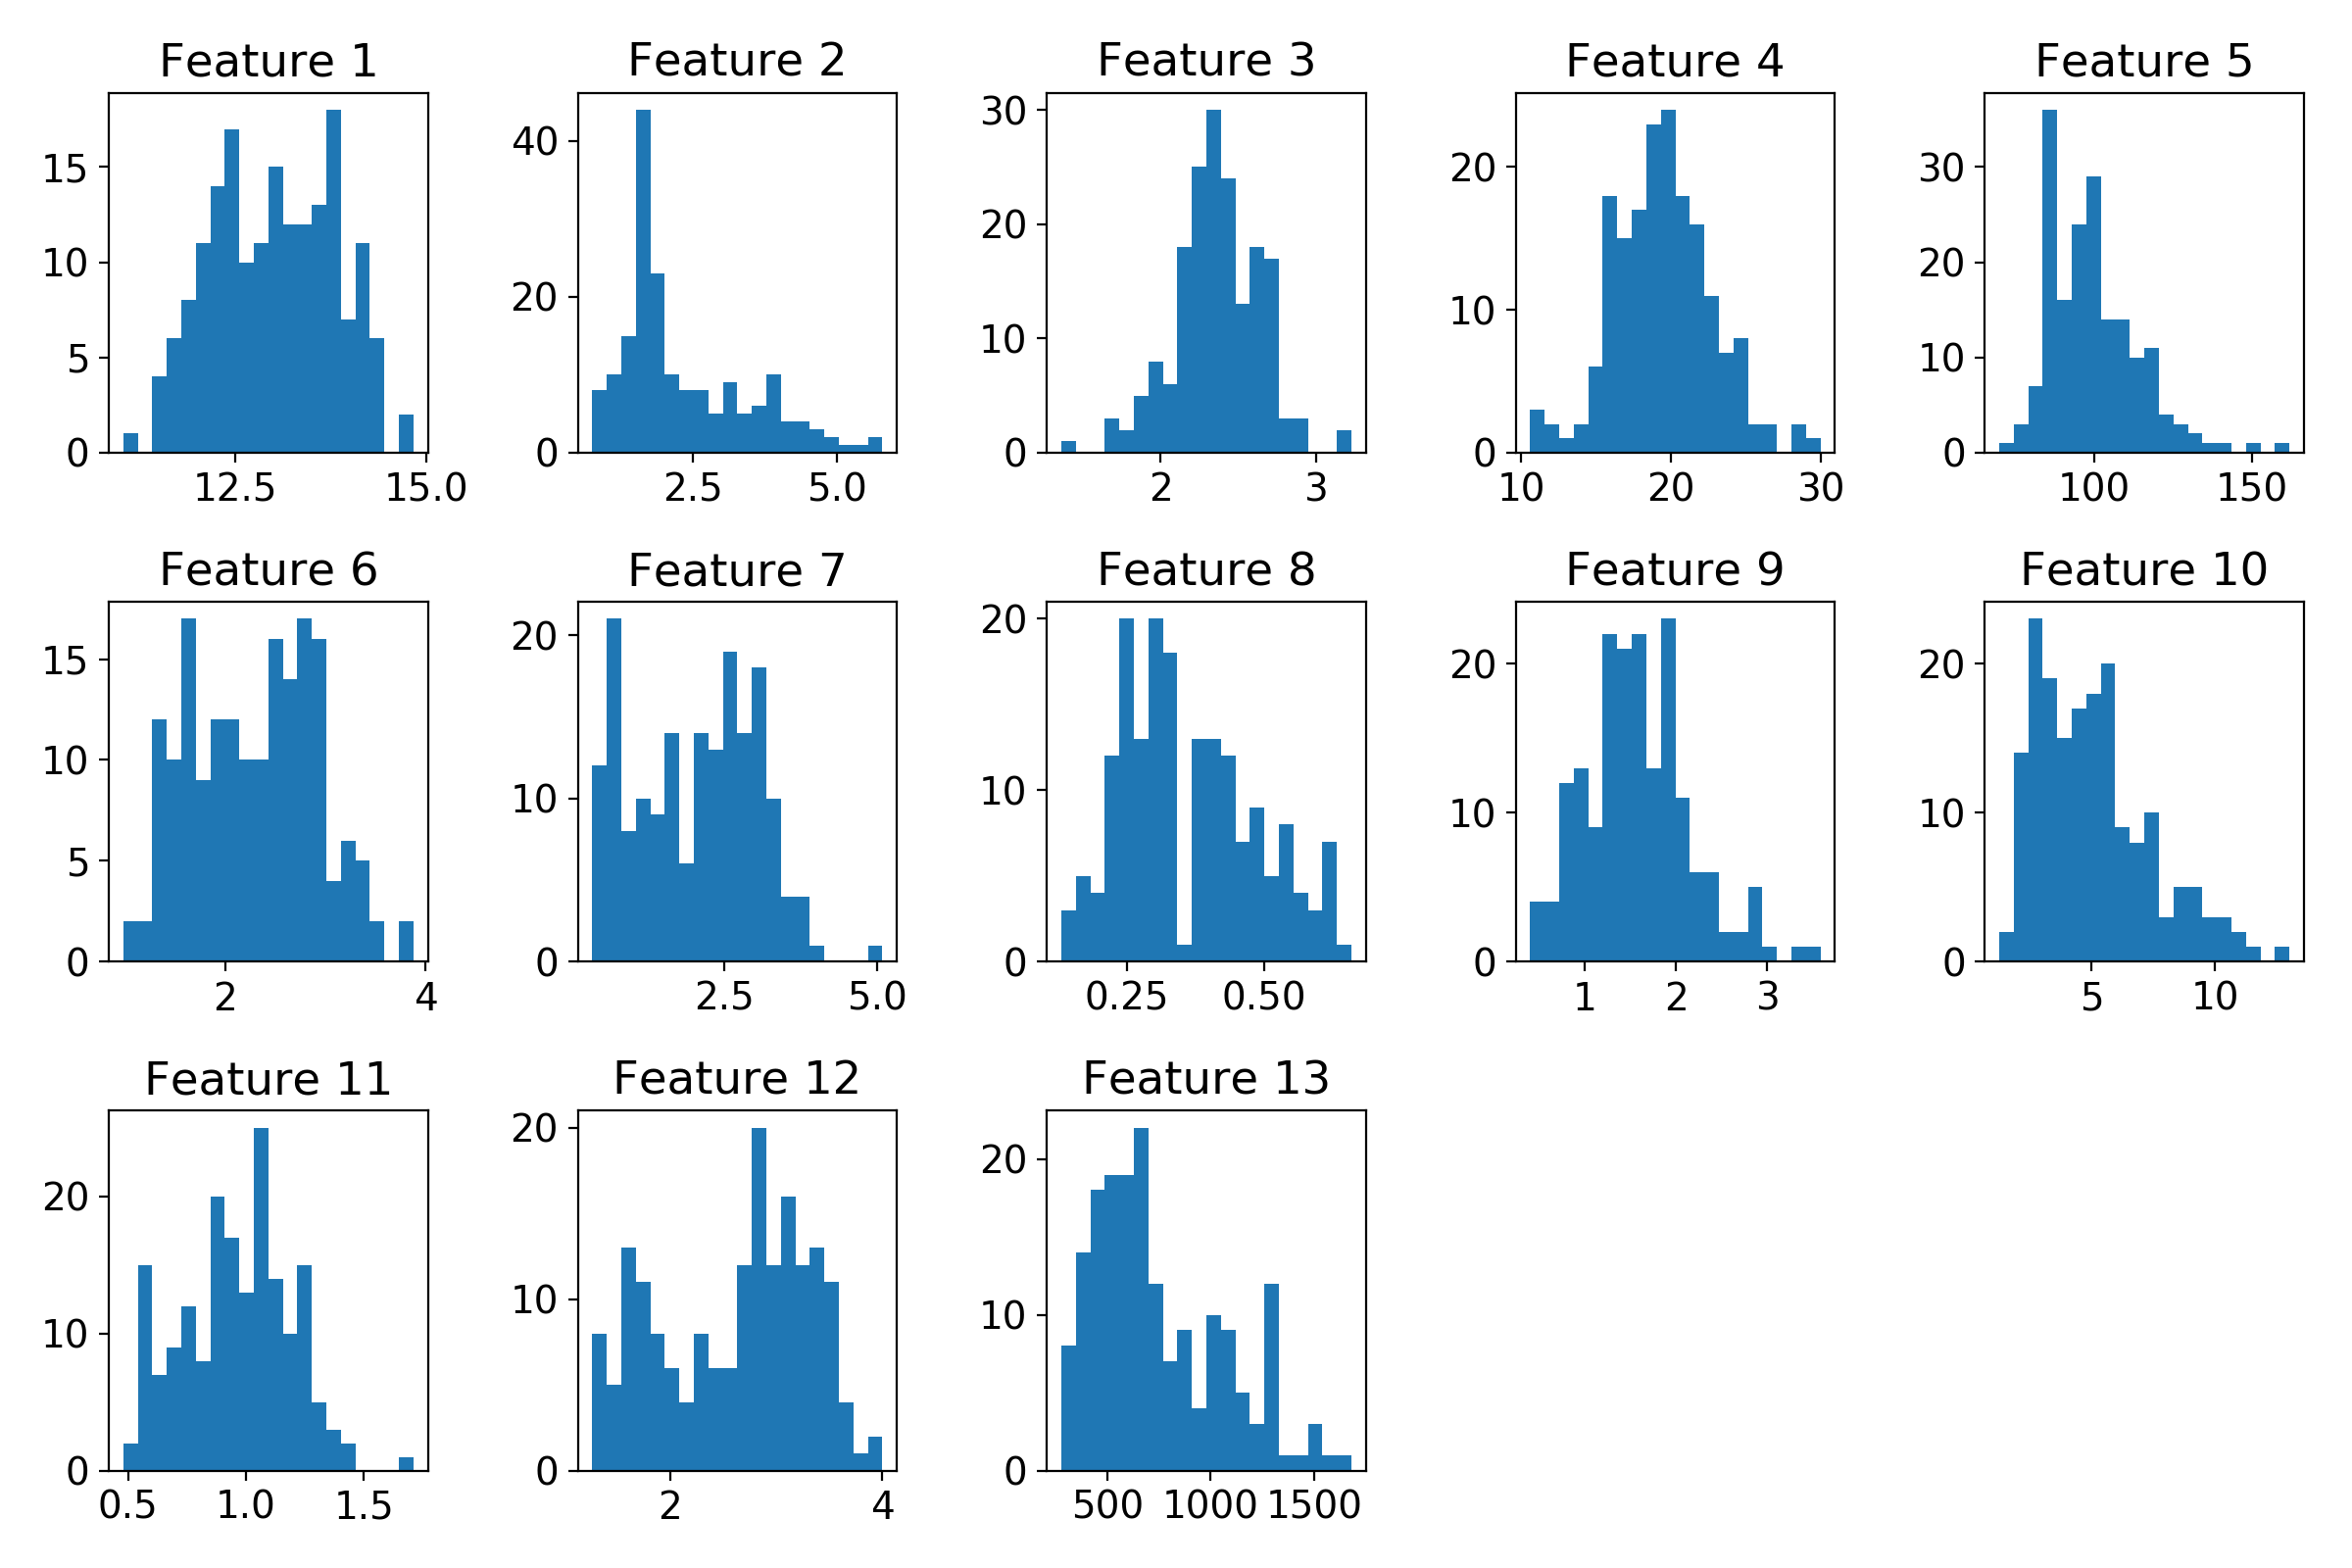

In [47]:
# check magnitude of features
plt.figure(figsize=(12, 8))
for i in range(X.shape[1]):
    plt.subplot(3, 5, i+1)
    plt.hist(X[:, i], bins=20)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

In [48]:
# check features' max magnitudes
feature_magnitudes = np.max(X, axis=0)
print("Feature Magnitudes:")
print(feature_magnitudes)

Feature Magnitudes:
[1.483e+01 5.800e+00 3.230e+00 3.000e+01 1.620e+02 3.880e+00 5.080e+00
 6.600e-01 3.580e+00 1.300e+01 1.710e+00 4.000e+00 1.680e+03]


## Scale

In [49]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>


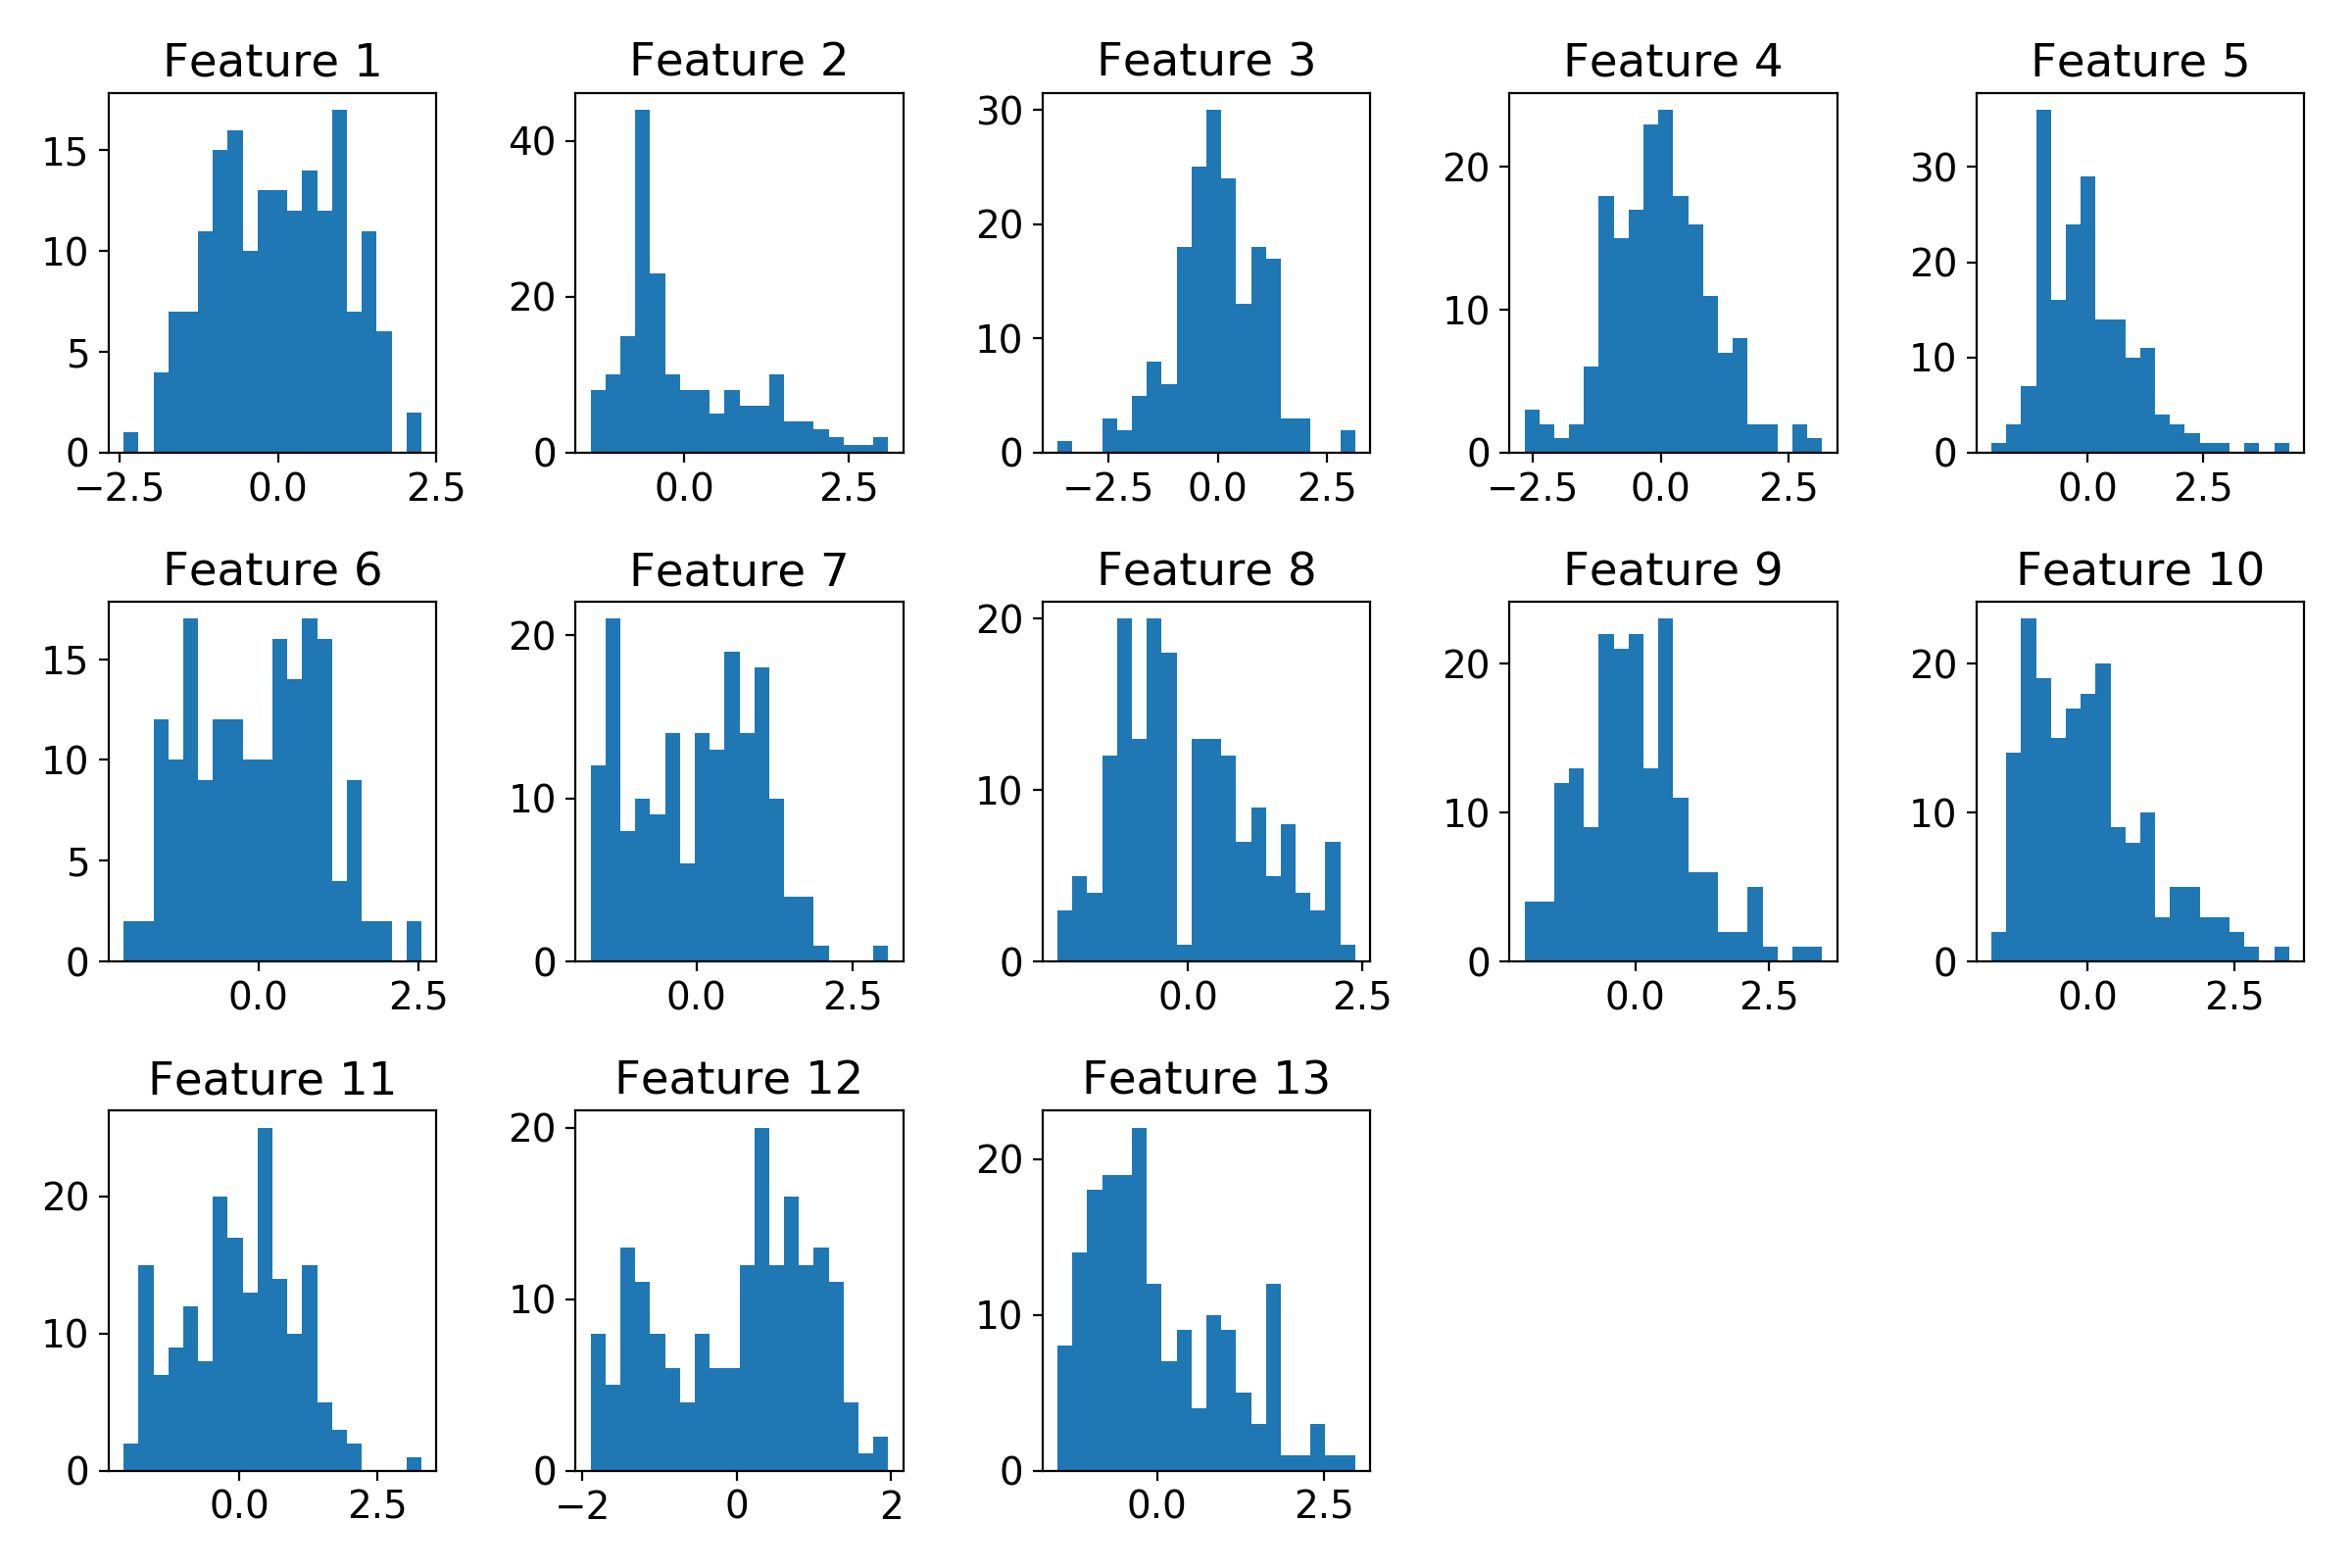

In [51]:
# check magnitude of features of scaled X
plt.figure(figsize=(12, 8))
for i in range(X_scaled.shape[1]):
    plt.subplot(3, 5, i+1)
    plt.hist(X_scaled[:, i], bins=20)
    plt.title(f'Feature {i+1}')
plt.tight_layout()
plt.show()

## Determine optimal number of PCA n_components

1) Scree plot appears to "bend" the most around 5 or 6, but the difference is too subtle
2) Reviewed each components explained variance ratio: cumulative explained variance from the first 3 components = 65%, 4th = 7%, 5th = 6.5%, 6th = 5%
3) Kiaser Criterion: only first 3 components have eigenvalues over 1

Conclusion: While the 4th and 5th component did not have eigenvalues over 1, including those 2 components increases the cumulatiive explained variance ~80% - including the 6th component appears to add little value.

#### Optimal number = 5 components

In [53]:
# Initiate and employ PCA for dimension reduction on scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

<IPython.core.display.Javascript object>


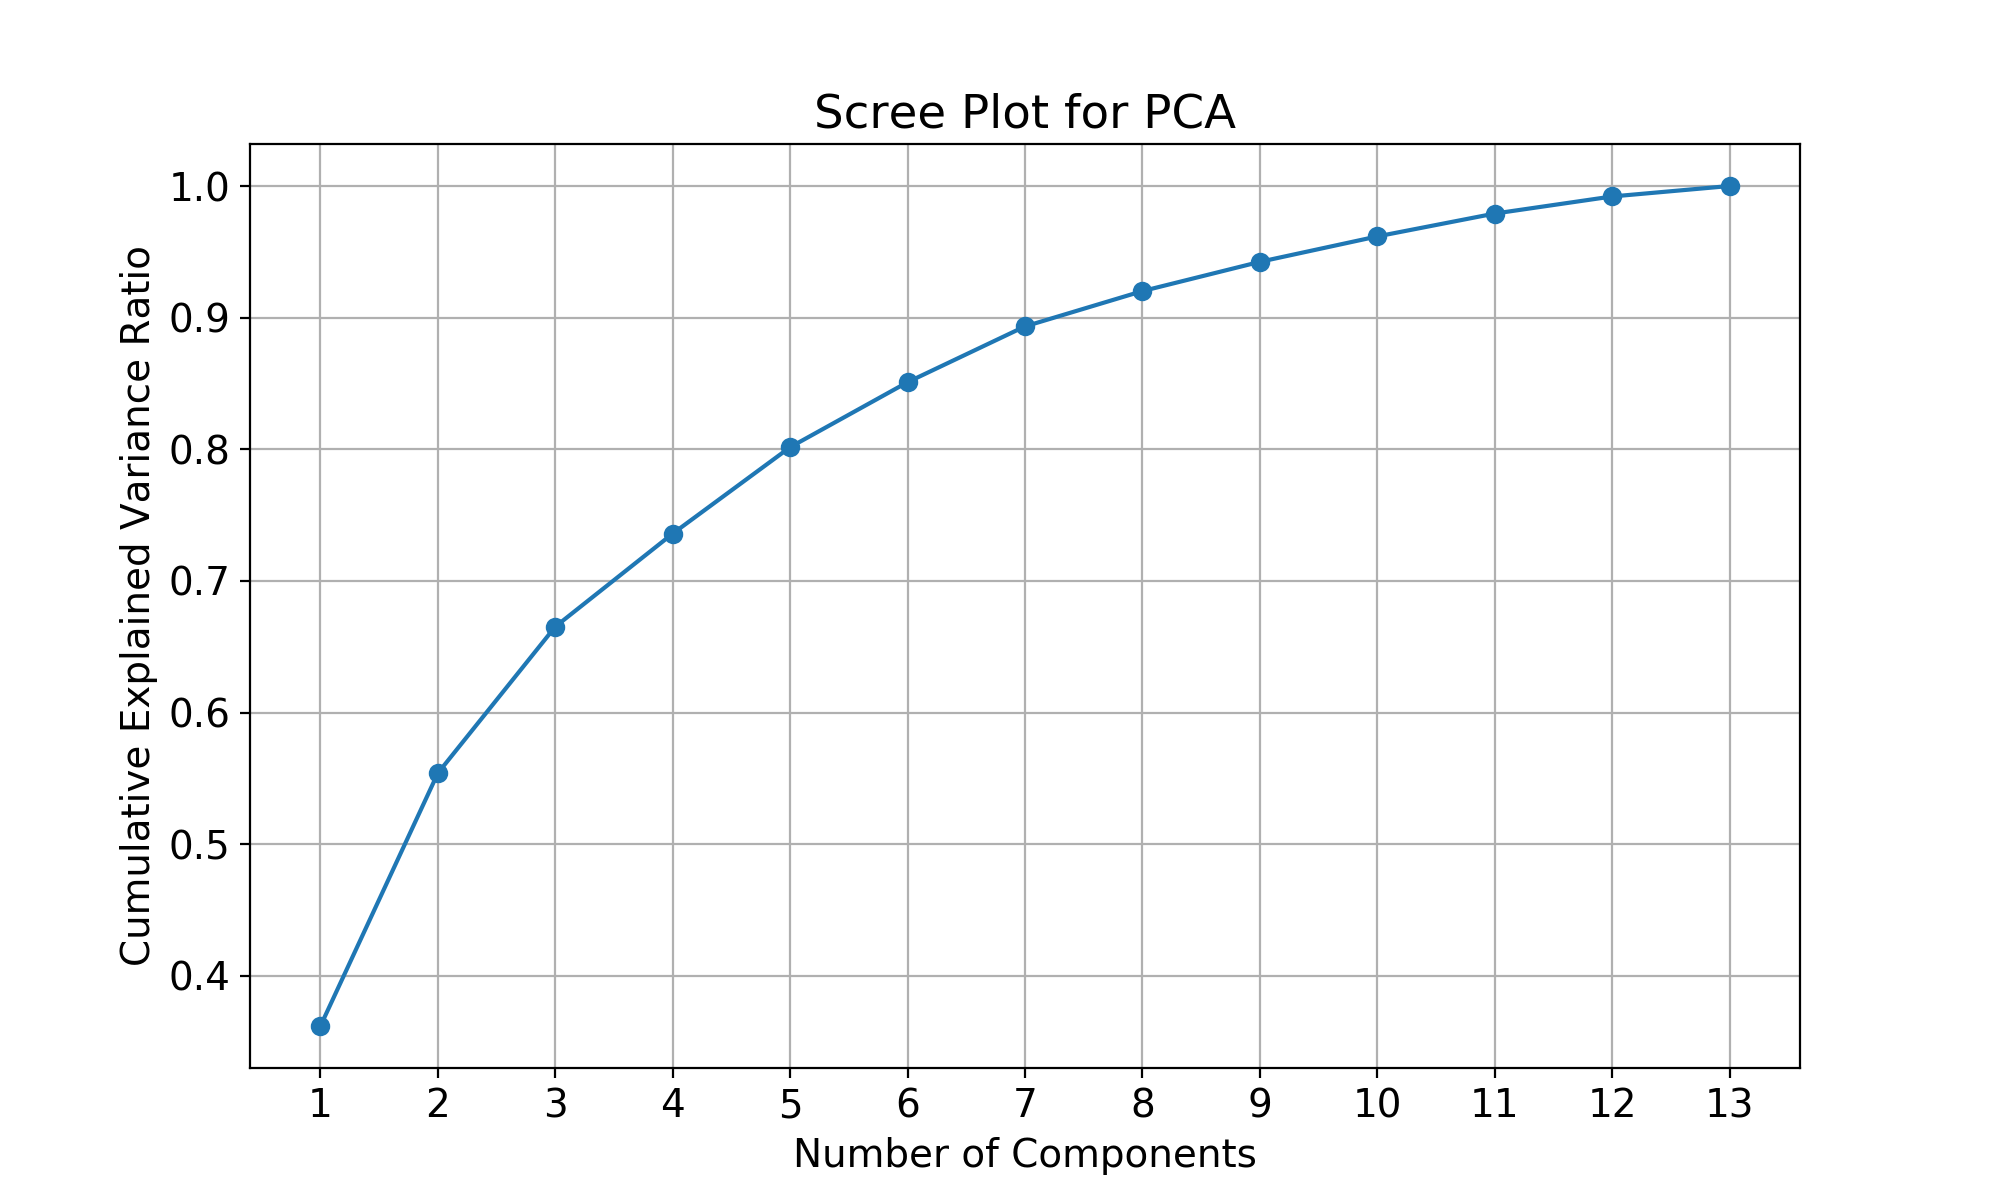

In [54]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
plt.title('Scree Plot for PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(np.arange(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

In [55]:
# check each compoenents variance ratio 
print("Explained variance ratio by component: ", pca.explained_variance_ratio_)

Explained variance ratio by component:  [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [56]:
# Kaiser criterion: use components with eigenvalues greater than 1.0 only
eigenvalues = pca.explained_variance_
print("Eigenvalues: ", eigenvalues)

Eigenvalues:  [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


## PCA

In [59]:
# PCA with n_components = 5
optimal_number = 5
pca = PCA(n_components = optimal_number)
X_pca = pca.fit_transform(X_scaled)

## Determine the optimal number of clusters from Kmeans
1) Silhouette score: optimal # of clusters = 3
2) Elbow method: optimal # of clusters = 3

<IPython.core.display.Javascript object>


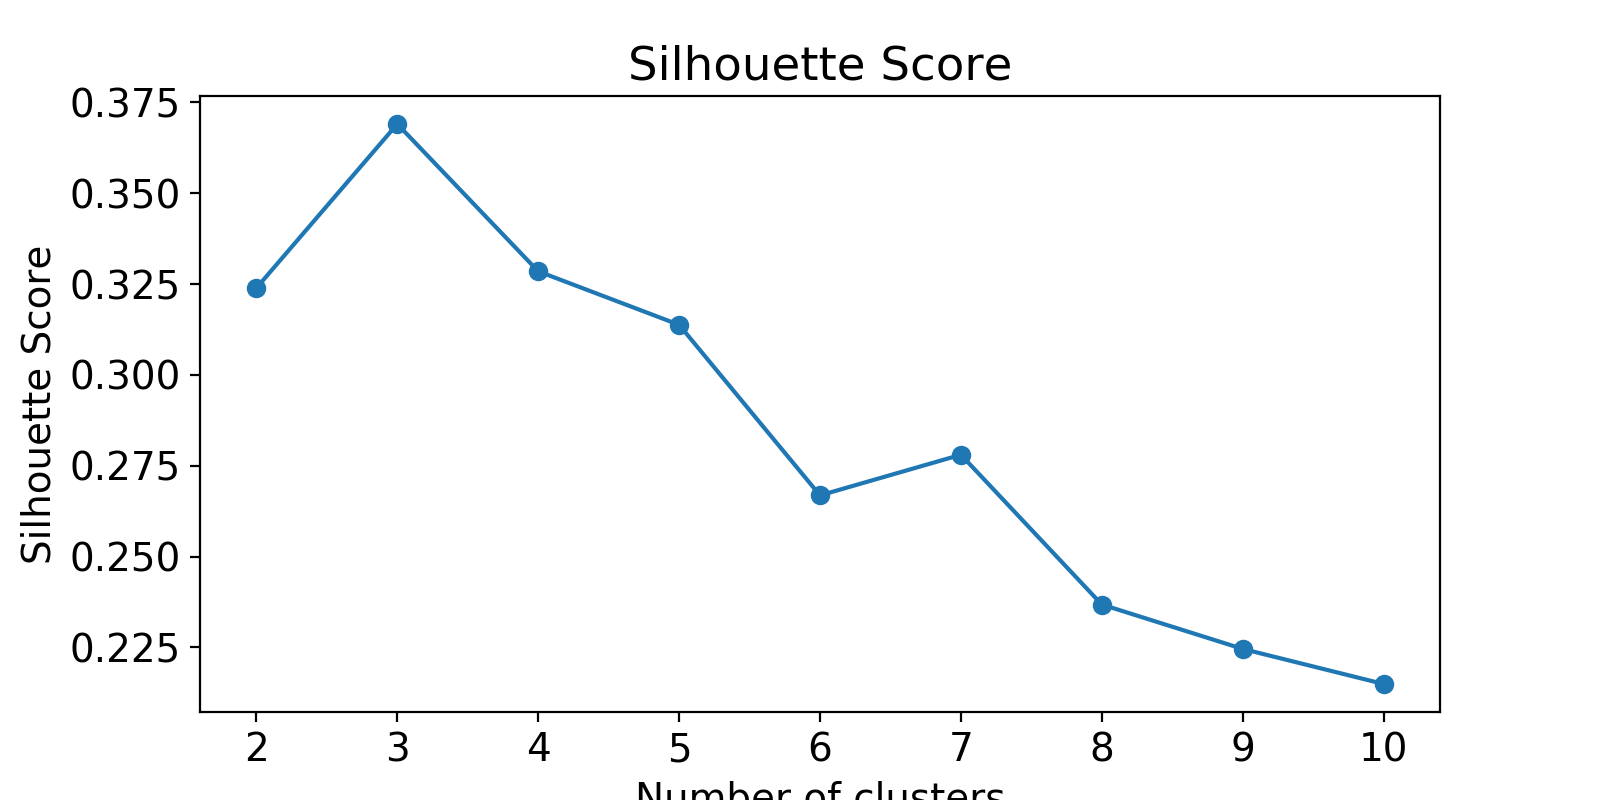

In [62]:
silhouette_scores = []
# Silhouette score can't be calculated for n=1, hence starting from n=2
for n in range(2, 11):
    kmeans = KMeans(n_clusters=n, random_state=1).fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

<IPython.core.display.Javascript object>


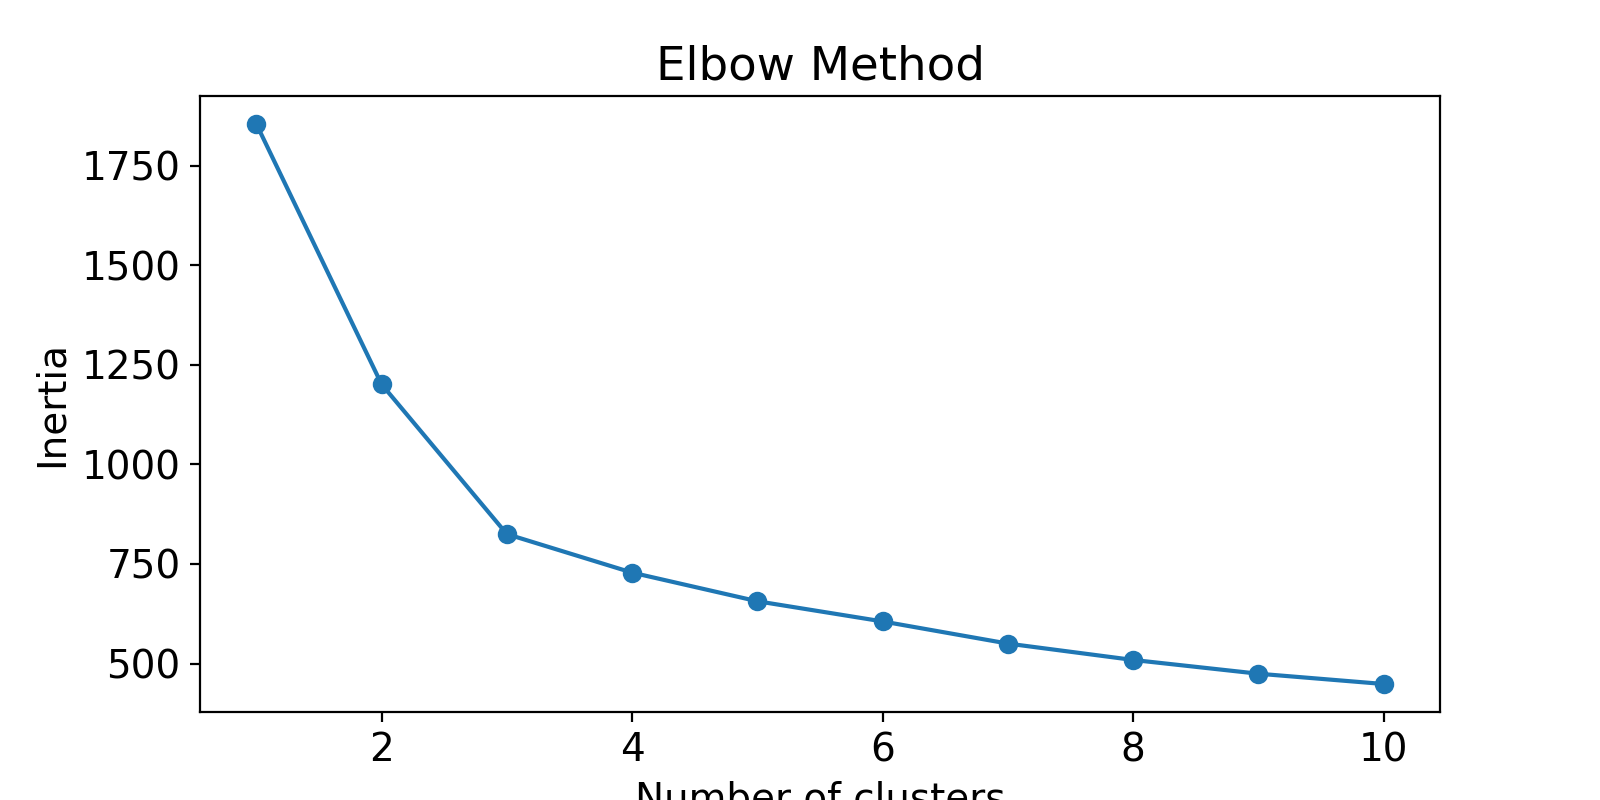

In [63]:
# Elbow Method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=1).fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Kmeans Cluster

In [65]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

## 2D Cluster (Kmeans) Plot

<IPython.core.display.Javascript object>


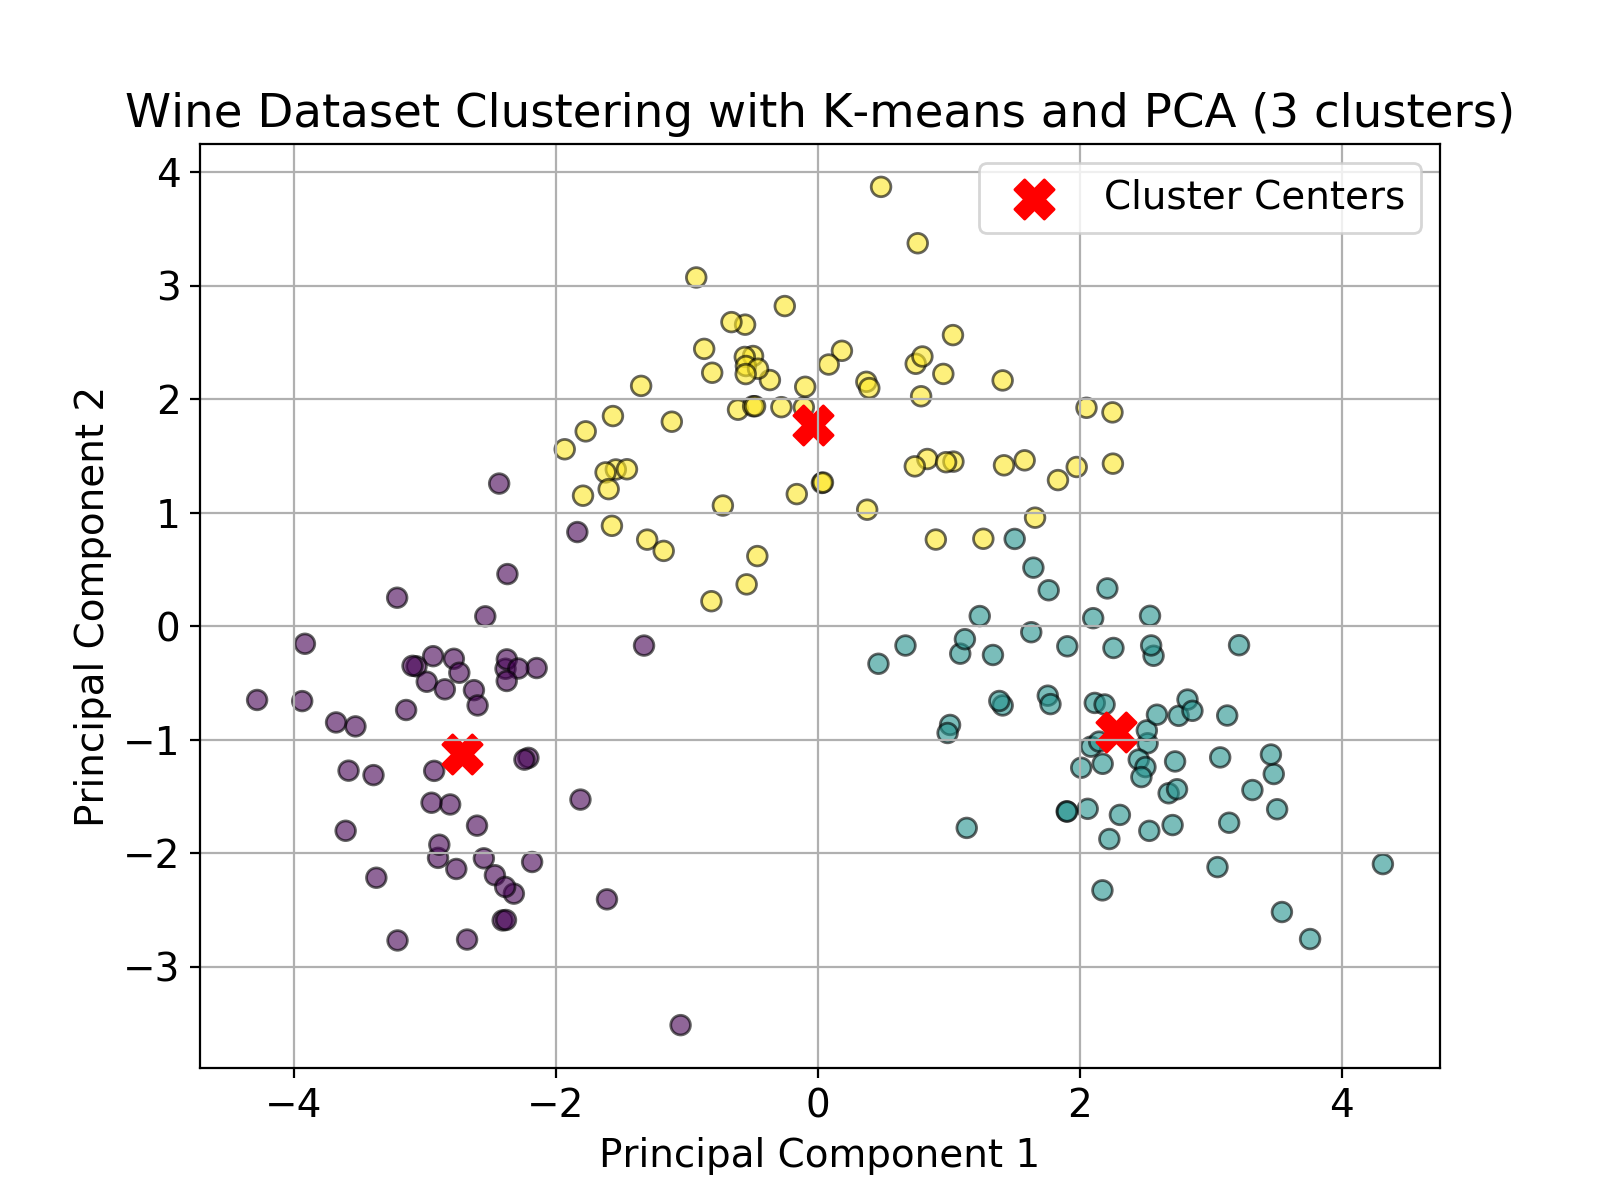

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Wine Dataset Clustering with K-means and PCA (3 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# 3D Cluster (Kmeans) Plot

<IPython.core.display.Javascript object>


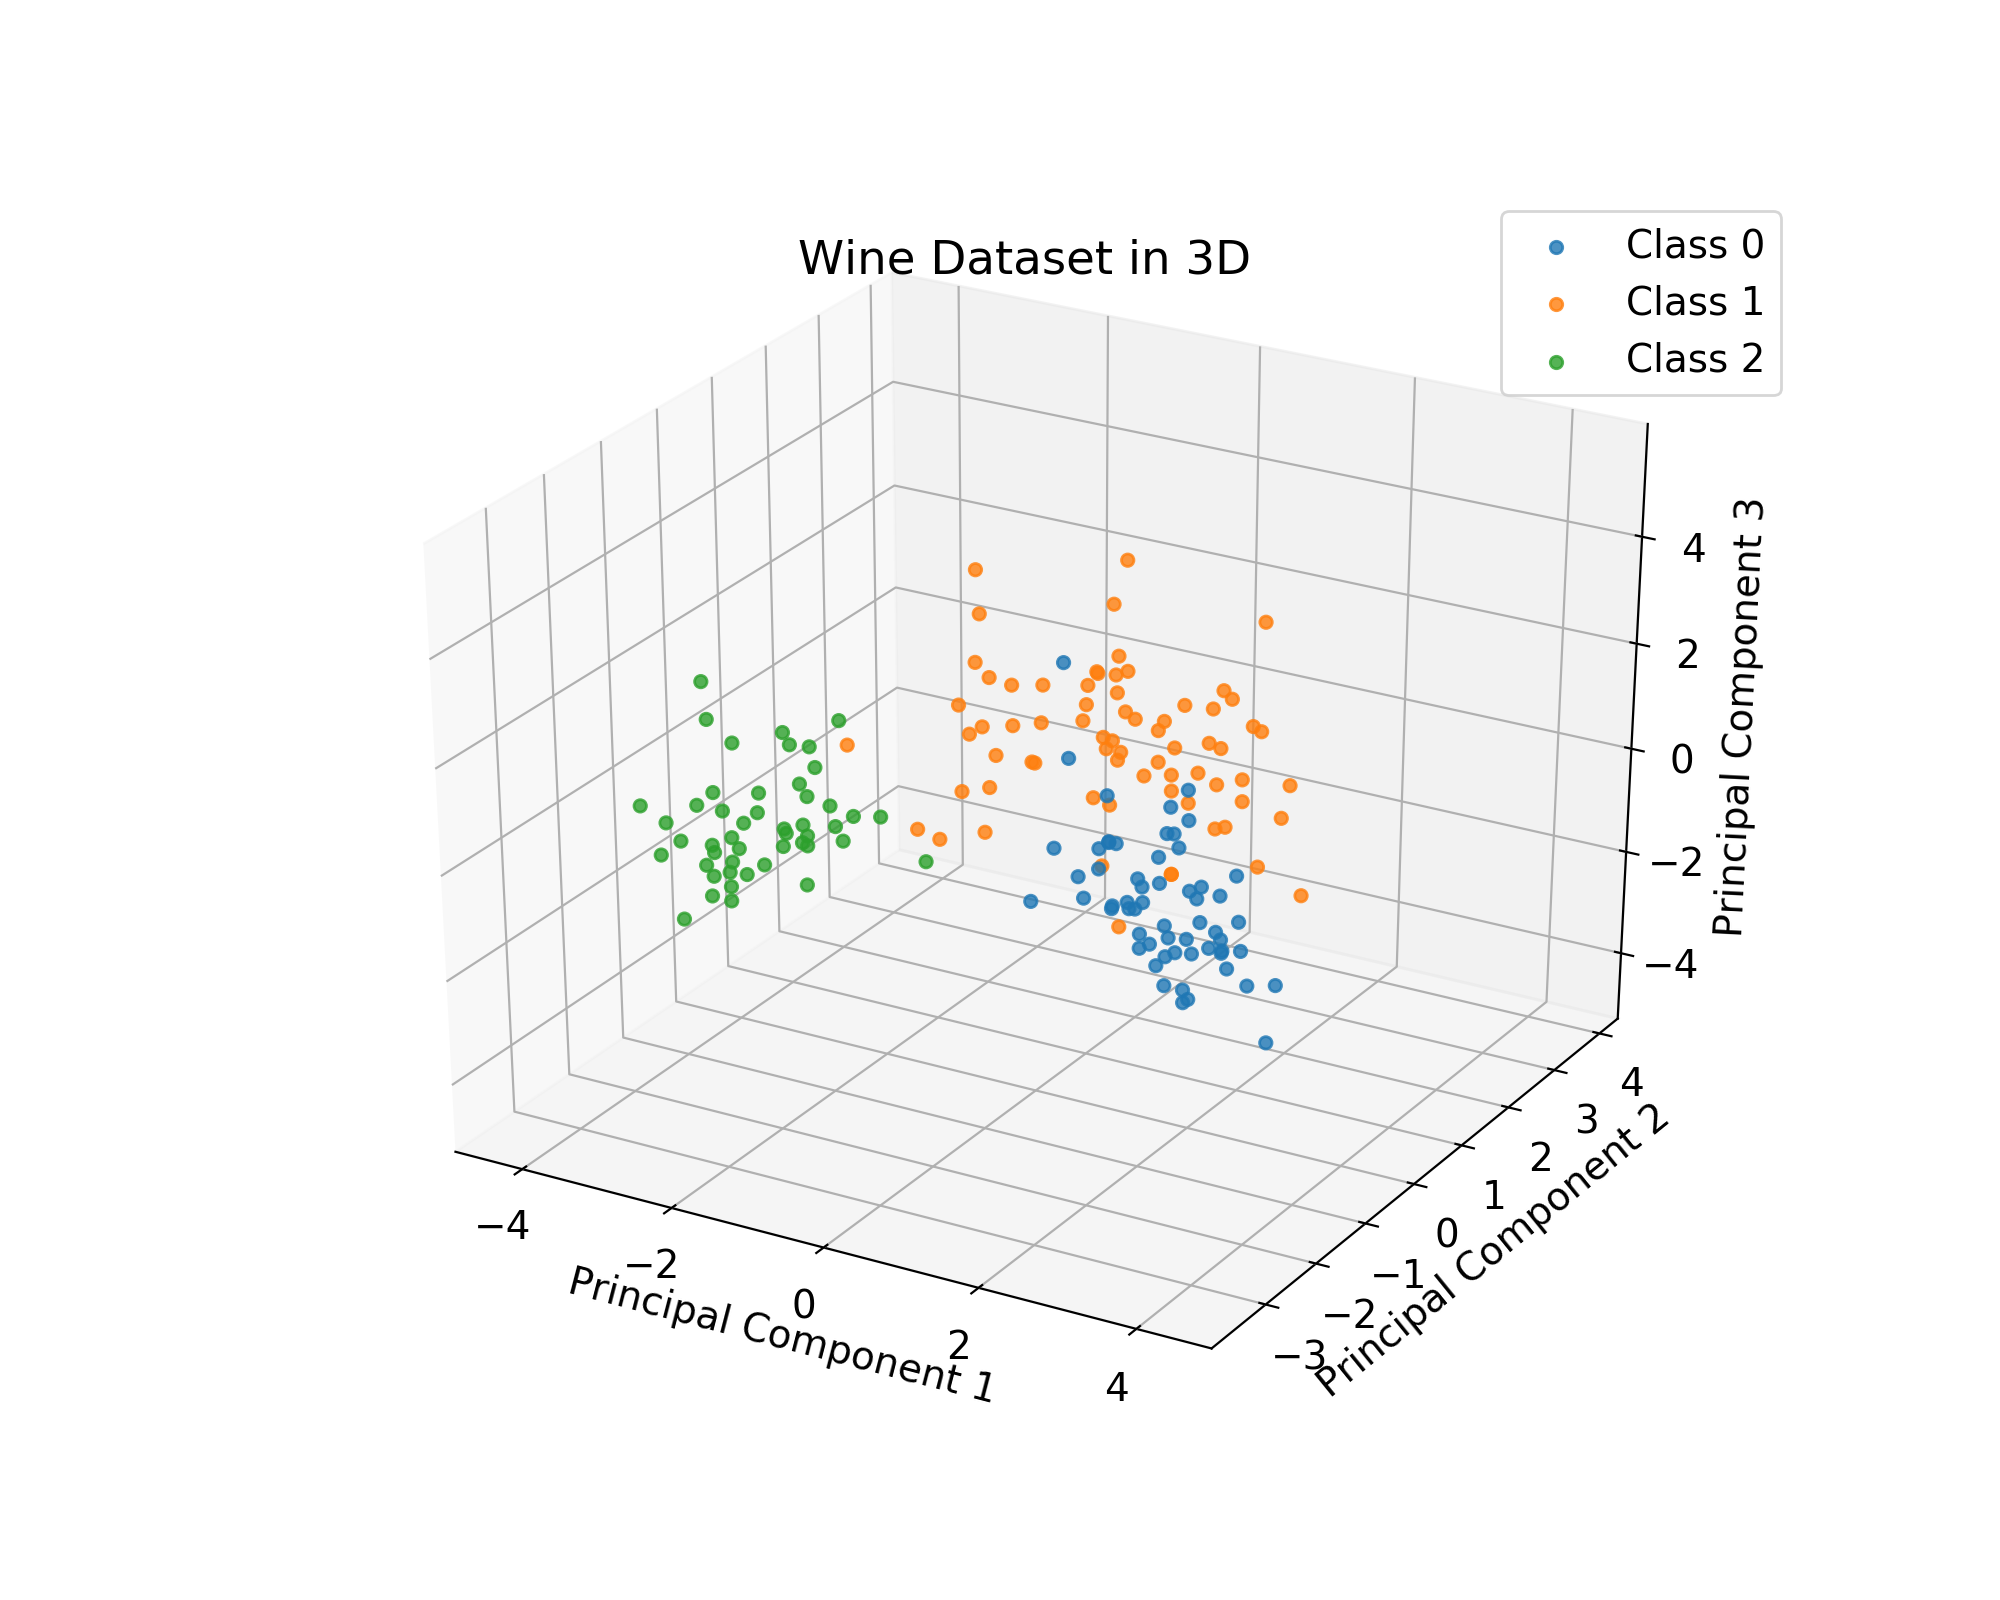

In [68]:
# need target to get labels to differentiate Classes using different colors
y = wine.target

# Plot the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color-coded classes
for label in np.unique(y):
    ax.scatter(X_pca[y == label, 0], X_pca[y == label, 1], X_pca[y == label, 2], label=f'Class {label}', alpha=0.8)

ax.set_title('Wine Dataset in 3D')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()